<a href="https://colab.research.google.com/github/harsh-tambi/StockMarketReturnLSTM/blob/main/StockreturnsusingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM, GRU, SimpleRNN, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [7]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [9]:
series = df['close'].values.reshape(-1, 1)

In [12]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [17]:
series.min()
series.max()

3.67285329953508

In [18]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)


In [19]:
#here we build the model that would guve us stiock returns
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1))

r = model.fit(X[:N//2], Y[:N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:])
              )




Epoch 1/80
20/20 [==============================] - 3s 34ms/step - loss: 0.9340 - val_loss: 4.1892
Epoch 2/80
20/20 [==============================] - 0s 8ms/step - loss: 0.7798 - val_loss: 3.7264
Epoch 3/80
20/20 [==============================] - 0s 9ms/step - loss: 0.6540 - val_loss: 3.3117
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.5541 - val_loss: 2.9220
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.4683 - val_loss: 2.6186
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.3941 - val_loss: 2.3519
Epoch 7/80
20/20 [==============================] - 0s 8ms/step - loss: 0.3297 - val_loss: 2.1203
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.2754 - val_loss: 1.9173
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.2277 - val_loss: 1.7763
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.1909 - val_loss: 1.6275
Epoch 11/80
20/20 

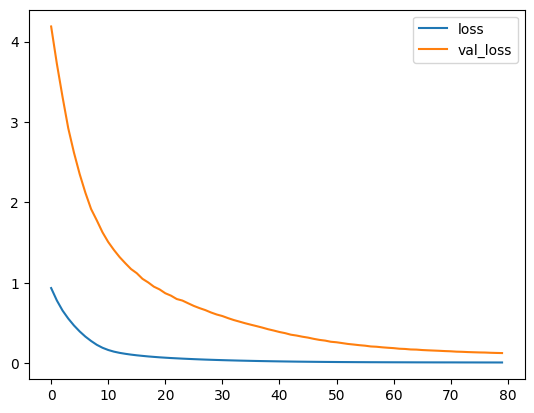

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

40/40 [==============================] - 0s 2ms/step
(1249, 1)


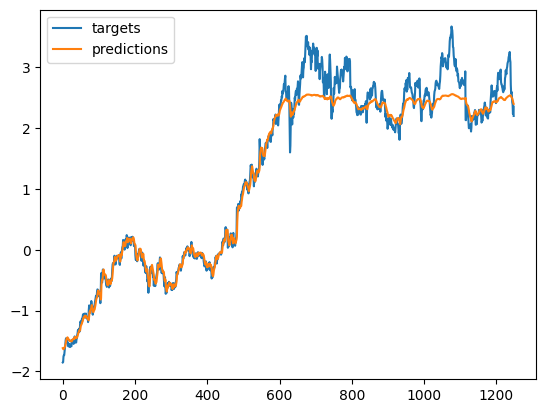

In [23]:
#One Step Forecast
outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()


In [24]:
df['PrevClose'] = df['close'].shift(1)

In [25]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [26]:
df['Return'] = (df['close']-df['PrevClose'])/(df['PrevClose'])

In [27]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

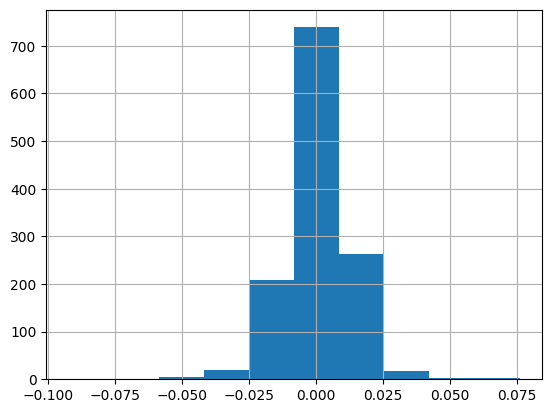

In [29]:
df['Return'].hist()

In [35]:
series = df['Return'].values[1:].reshape(-1, 1)
series

array([[-0.00408018],
       [ 0.00213751],
       [-0.00764309],
       ...,
       [-0.01936525],
       [ 0.01682209],
       [-0.02067973]])

In [36]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [37]:
series

array([-0.43811722,  0.08061497, -0.73536414, ..., -1.71332483,
        1.30572463, -1.82299002])

In [38]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

In [39]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01))

r = model.fit(X[:N//2], Y[:N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:])
              )



Epoch 1/80
20/20 [==============================] - 3s 37ms/step - loss: 1.0202 - val_loss: 1.1541
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 1.0070 - val_loss: 1.1442
Epoch 3/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9999 - val_loss: 1.1392
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9947 - val_loss: 1.1365
Epoch 5/80
20/20 [==============================] - 0s 13ms/step - loss: 0.9913 - val_loss: 1.1354
Epoch 6/80
20/20 [==============================] - 0s 12ms/step - loss: 0.9892 - val_loss: 1.1359
Epoch 7/80
20/20 [==============================] - 0s 12ms/step - loss: 0.9864 - val_loss: 1.1359
Epoch 8/80
20/20 [==============================] - 0s 13ms/step - loss: 0.9853 - val_loss: 1.1351
Epoch 9/80
20/20 [==============================] - 0s 13ms/step - loss: 0.9845 - val_loss: 1.1373
Epoch 10/80
20/20 [==============================] - 0s 12ms/step - loss: 0.9834 - val_loss: 1.1379
Epoch 11/80

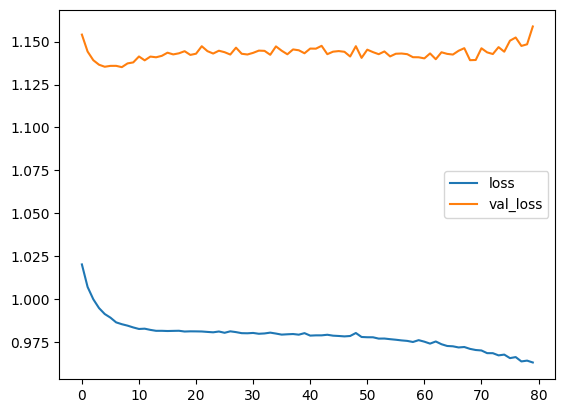

In [40]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

39/39 [==============================] - 1s 2ms/step
(1248, 1)


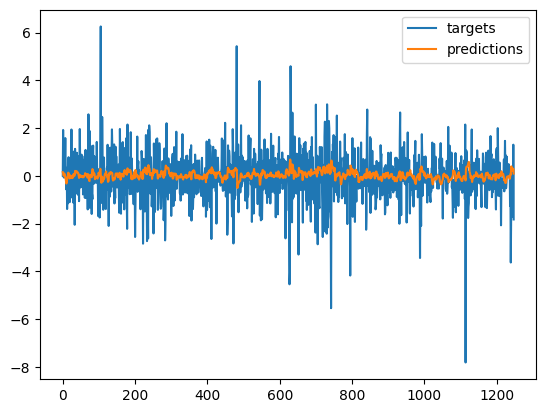

In [41]:
#One Step Forecast
outputs = model.predict(X)
print (outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [42]:
#All these modles above do not work correctly. Hence, they need to be edited and fine tuned a bit to make them work in the best possible way.

In [ ]:
#Regression is harder than classification, when it comes to predicting future values. So it's better we try to predicts values.

In [46]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [51]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T
# X = []
# Y = []
# for t in range(len(series)-T):
#   x = series[t:t+T]
#   X.append(x)
#   y = series[t+T]
#   Y.append(y)
# X = np.array(X).reshape(-1, T, 1)
# Y = np.array(Y)
# N = len(X)

In [52]:
N_train = len(input_data) * 2//3
scaler = StandardScaler()
scaler.fit(input_data[:N_train+T])
input_data = scaler.transform(input_data)

In [54]:
X_train = np.zeros((N_train, T, D))
Y_train = np.zeros(N_train)

for t in range(N_train):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T]>0)


In [55]:
X_test = np.zeros((N-N_train, T, D))
Y_test = np.zeros(N-N_train)

In [56]:
for u in range(N-N_train):
  t = u + N_train
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T]>0)

In [59]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'])

In [60]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, batch_size=32)

Epoch 1/300
27/27 [==============================] - 4s 29ms/step - loss: 0.6952 - accuracy: 0.5077 - val_loss: 0.6957 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5280 - val_loss: 0.6919 - val_accuracy: 0.5073
Epoch 3/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5232 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6904 - accuracy: 0.5209 - val_loss: 0.6928 - val_accuracy: 0.4878
Epoch 5/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6918 - accuracy: 0.5256 - val_loss: 0.6896 - val_accuracy: 0.5317
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5304 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 7/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.5435 - val_loss: 0.6910 - val_accuracy: 0.5366
Epoch 8/3

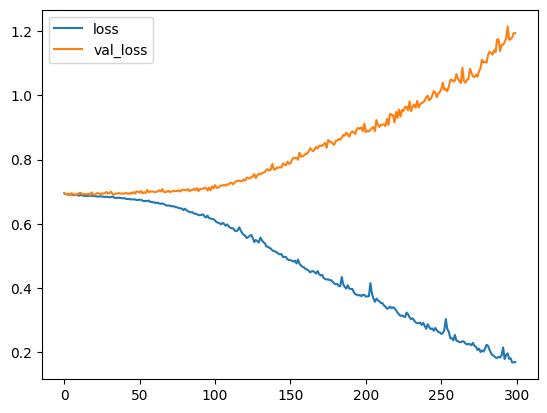

In [61]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

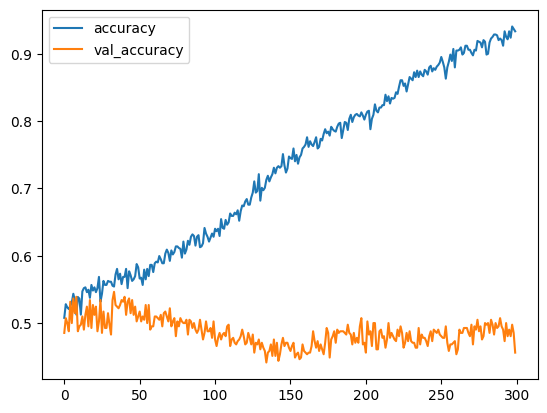

In [63]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [64]:
#The binary classificaiton model is correct 50 percent of the times